# Benchmark M3.2: Water flow in roots - Static root system

by Daniel Leitner, Andrea Schnepf 

In [29]:
import os
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from rsml import * 
from van_genuchten import *

## Comparison of numerical solutions to reference solution

We compare different numerical codes by solving the benchmarking problems.

### Result data M3.2(a)

Save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second line. Locate the file in the folder `/M32a Numerical results/simulatorname`.  

### Result data M3.2(b)

Save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second line. Locate the file in the folder `/M32b Numerical results/simulatorname`.

We compare different numerical codes by solving the benchmarking problems. In addition, we provide links to Jupyter Notebooks that describe the numerical implementation of a benchmark problem in a specific code should they be available in the subfolder 'M3.2 Model descriptions'

1. Dumux:from  -498.4342348369011 to -240.76349069826708  cm pressure head

2. OpenSimRoot:from  -496.8 to -247.1  cm pressure head

3. RSWMS:from  -495.492 to -240.77  cm pressure head

5. SRI:from  -500.0 to -240.647  cm pressure head



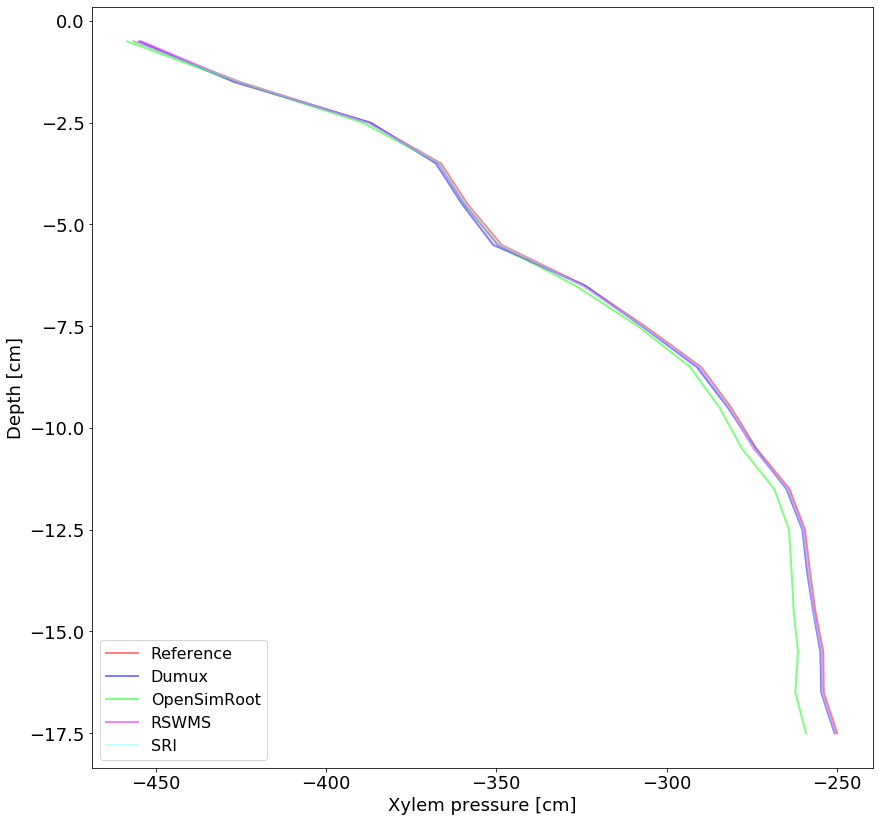

1. Dumux:from  -498.1539086391437 to -199.24160614169216  cm pressure head

2. OpenSimRoot:from  -496.2 to -199.5  cm pressure head

3. RSWMS:from  -494.734 to -199.236  cm pressure head

5. SRI:from  -500.0 to -199.151  cm pressure head



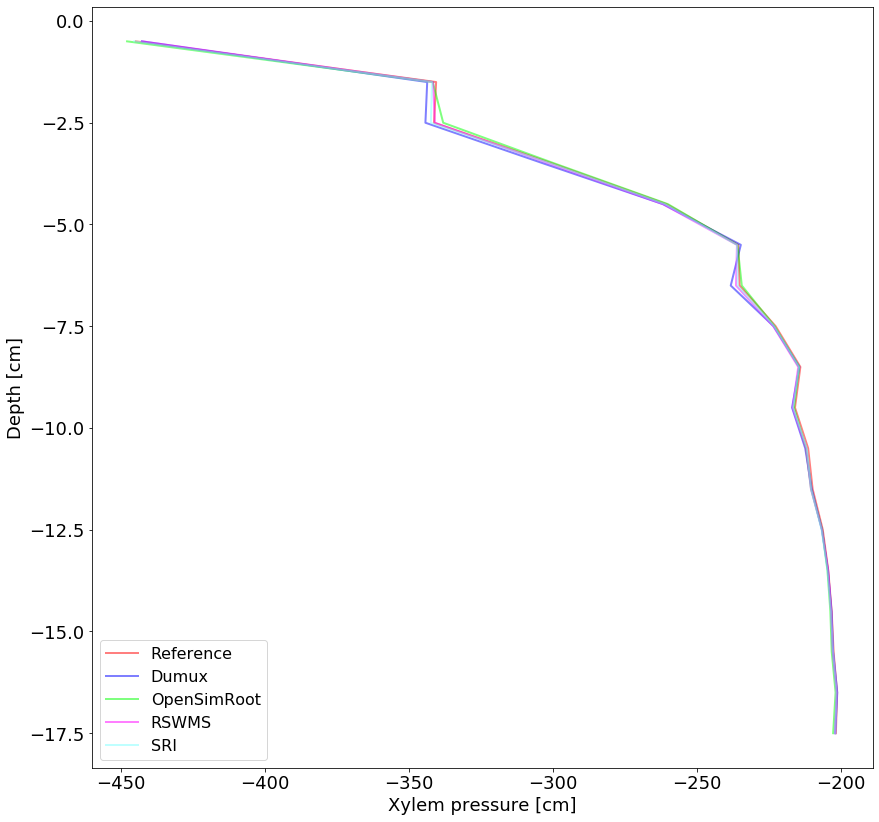

In [52]:
def plot_results(path):

    fig, ax = plt.subplots(1, 1, figsize=(14,14)) 
    ax = [ax]    
    l = ["Reference"]    
    data = np.loadtxt(path+l[0],delimiter=',') # analytical solution
    ind = np.argsort(data[0,:])                
    psi_ = data[1, ind]
    z_ = data[0, ind]
    layer_mean_a = [np.mean(psi_[(z_>-i-1) & (z_<=-i) & (psi_<-1)]) for i in range(0,18)]
    
    ax[0].plot(layer_mean_a, -np.linspace(0.5,17.5,18), color = 'red', alpha = 0.5, linewidth = 2)
    # ax[0].scatter(psi_a, z_a, marker ='*', color = 'red', s=1)
    # ax[0].hist(psi_a, bins = 20)

    cc = 1
    nrsmea, namea = [] ,[]
    for dirname, dirnames, filenames in os.walk(path+'.'):
        filenames.sort()
        for i,f in enumerate(filenames):
            try:
                if f!="Reference":
                    l.append(f)
                    data = np.loadtxt(path+f,delimiter=',')        
                    print(str(i+1)+". "+f+":from ", min(data[1,:]), "to", max(data[1,data[1,:]<-1]), " cm pressure head\n") 
                    ind = np.argsort(data[0,:])                
                    psi_ = data[1, ind]
                    z_ = data[0, ind]
                    layer_mean_a = [np.mean(psi_[(z_>-i-1) & (z_<=-i) & (psi_<-1)]) for i in range(0,18)]                    
                    ax[0].plot(layer_mean_a, -np.linspace(0.5,17.5,18), color = col[cc,:], alpha = 0.5, linewidth = 2)                

                    # ax[0].scatter(data[1,:], data[0,:], color = col[cc,:], alpha = 0.5, s=1)
                    # ax[0].hist(data[1,:], bins = 20, alpha = 0.5)
                    z_n = data[0,:]
                    psi_n = data[1,:]
                    interp = interp1d(z_n, psi_n,  kind='linear', fill_value='extrapolate', bounds_error = False) 
                    psi_n = interp(z_a)                 
                    nrsmea.append(nRMSE(psi_a,psi_n))
                    namea.append(f)
                    cc += 1
            except Exception as ex:
                print("Something went wrong with file "+f)    
                raise            
    ax[0].set_xlabel("Xylem pressure [cm]")  
    ax[0].set_ylabel("Depth [cm]")  
    ax[0].legend(l, loc = 3)

    plt.savefig('m32_results.png', dpi=300, bbox_inches = "tight")
    plt.show() 
    
plot_results('M3.2a Numerical results/')
plot_results('M3.2b Numerical results/')

(2, 2884)
(2, 2883)
1. Dumux:from  -498.4342348369011 to -240.76349069826708  cm pressure head

(2, 2940)
2. OpenSimRoot:from  -496.8 to -247.1  cm pressure head

(2, 5766)
3. RSWMS:from  -495.492 to -240.77  cm pressure head

(2, 2884)
5. SRI:from  -500.0 to -240.647  cm pressure head

m3.2a numerical results.png


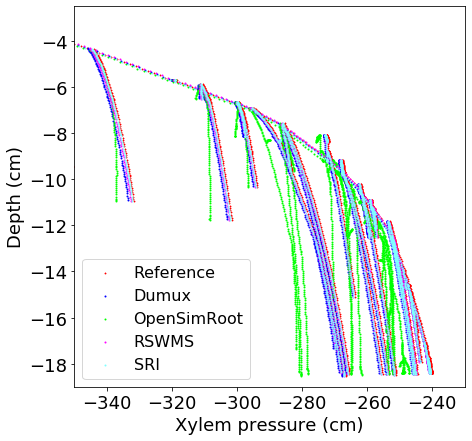

(2, 2884)
(2, 2883)
1. Dumux:from  -498.1539086391437 to -199.24160614169216  cm pressure head

(2, 2940)
2. OpenSimRoot:from  -496.2 to -199.5  cm pressure head

(2, 5766)
3. RSWMS:from  -494.734 to -199.236  cm pressure head

(2, 2884)
5. SRI:from  -500.0 to -199.151  cm pressure head

m3.2b numerical results.png


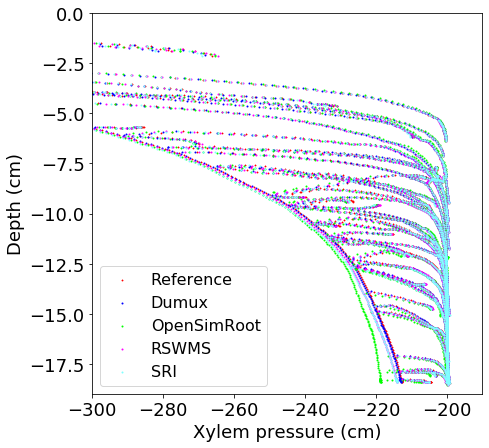

In [63]:
def plot_results(path, xmin, xmax, ymin, ymax):

    fig, ax = plt.subplots(1, 1, figsize=(7,7)) 
    ax = [ax]
    l = ["Reference"]
    
    data = np.loadtxt(path+l[0],delimiter=',') # analytical solution
    print(data.shape)
    z_a = data[0,:]
    psi_a = data[1,:]
    ax[0].scatter(psi_a, z_a, marker ='*', color = 'red', s=1)

    cc = 1
    nrsmea, namea = [] ,[]
    for dirname, dirnames, filenames in os.walk(path+'.'):
        filenames.sort()
        for i,f in enumerate(filenames):
            try:
                if f!="Reference":
                    l.append(f)
                    data = np.loadtxt(path+f,delimiter=',')  
                    print(data.shape)
                    print(str(i+1)+". "+f+":from ", min(data[1,:]), "to", max(data[1,data[1,:]<-1]), " cm pressure head\n") 
                    ax[0].scatter(data[1,data[1,:]<-1], data[0,data[1,:]<-1], color = col[cc,:], alpha = 1, s=1)
                    z_n = data[0,:]
                    psi_n = data[1,:]
                    interp = interp1d(z_n, psi_n,  kind='linear', fill_value='extrapolate', bounds_error = False) 
                    psi_n = interp(z_a)                 
                    nrsmea.append(nRMSE(psi_a,psi_n))
                    namea.append(f)
                    cc += 1
            except Exception as ex:
                print("Something went wrong with file "+f)    
                raise            
    ax[0].set_xlabel("Xylem pressure (cm)")  
    ax[0].set_xlim(xmin, xmax)
    ax[0].set_ylabel("Depth (cm)")  
    ax[0].set_ylim(ymin, ymax)
    ax[0].legend(l, loc = 3)

    plt.savefig(path.lower()[:-1]+".png", dpi=300, bbox_inches = "tight")
    print(path.lower()[:-1]+".png")
    plt.show() 

plot_results('M3.2a Numerical results/', -350, -230, -19, - 2.5)
plot_results('M3.2b Numerical results/', -300, -190, -19, 0)

Table compares wrong value, must map one to one by guessing...

In [46]:
import pandas as pd 

data_ = np.array([namea, nrsmea, nrsmeb])
data_ = np.array(data_.transpose())

df = pd.DataFrame(data_, columns = ['Name','nRSME (a)','nRSME (b)'] ) # Create the pandas DataFrame 
df['nRSME (a)'] = df['nRSME (a)'].astype(float)
df['nRSME (a)'] = df['nRSME (a)'].map('{:,.4f}'.format)
df['nRSME (b)'] = df['nRSME (b)'].astype(float)
df['nRSME (b)'] = df['nRSME (b)'].map('{:,.4f}'.format)

df.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
]
).hide_index()

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0)
fig.savefig("table_m32.png")

NameError: name 'nrsmeb' is not defined